# Task 2: Price a commodity storage contract

The desk now has the price data they need. The final ingredient before they can begin trading with the client is the pricing model. Alex tells you the client wants to start trading as soon as possible. They believe the winter will be colder than expected, so they want to buy gas now to store and sell in winter in order to take advantage of the resulting increase in gas prices. They ask you to write a script that they can use to price the contract. Once the desk are happy, you will work with engineering, risk, and model validation to incorporate this model into production code.

- The concept is simple: any trade agreement is as valuable as the price you can sell minus the price at which you are able to buy. Any cost incurred as part of executing this agreement is also deducted from the overall value. So, for example, if I can purchase a million MMBtu of natural gas in summer at 2/MMBtu, store this for four months, and ensure that I can sell the same quantity at 3/MMBtu without incurring any additional costs, the value of this contract would be (3-2) *1e6 = 1million. If there are costs involved, such as having to pay the storage facility owner a fixed fee of 100K a month, then the 'value' of the contract, from my perspective, would drop by the overall rental amount to 600K. Another cost could be the injection/withdrawal cost, like having to pay the storage facility owner 10K per 1 million MMBtu for injection/withdrawal, then the price will further go down by 10K to 590K. Additionally, if I am supposed to foot a bill of 50K each time for transporting the gas to and from the facility, the cost of this contract would fall by another $100K. Think of the valuation as a fair estimate at which both the trading desk and the client would be happy to enter into the contract. 

# Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Read Data

In [55]:
df = pd.read_csv("./Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


# Preprocess Data

In [58]:
# Load data
df['Dates'] = pd.to_datetime(df['Dates'])
df['Timestamp'] = df['Dates'].map(datetime.toordinal)  # Convert dates to numerical format

C:\Users\tinot\AppData\Local\Temp\ipykernel_14044\4021345305.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [60]:
df.head()

,Dates,Prices,Timestamp
0,2020-10-31,10.1,737729
1,2020-11-30,10.3,737759
2,2020-12-31,11.0,737790
3,2021-01-31,10.9,737821
4,2021-02-28,10.9,737849


# Fit Linear Regression model

In [63]:
# Fit Linear Regression model
X = df[['Timestamp']]
y = df['Prices']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Generate future dates for extrapolation

In [66]:
# Generate future dates for extrapolation
future_dates = pd.date_range(df['Dates'].max() + pd.DateOffset(months=1), periods=12, freq='M')
future_timestamps = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
forecast_prices = model.predict(future_timestamps)

C:\Users\tinot\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Append forecast to dataframe

In [69]:
# Append forecast to dataframe
forecast_df = pd.DataFrame({'Dates': future_dates, 'Prices': forecast_prices})

In [79]:
# Load data
forecast_df['Dates'] = pd.to_datetime(forecast_df['Dates'])
forecast_df['Timestamp'] = forecast_df['Dates'].map(datetime.toordinal)  # Convert dates to numerical format

In [81]:
# Combine past and future data
full_df = pd.concat([df, forecast_df])

In [83]:
full_df.head(100)

,Dates,Prices,Timestamp
0,2020-10-31,10.100000,737729
1,2020-11-30,10.300000,737759
2,2020-12-31,11.000000,737790
3,2021-01-31,10.900000,737821
4,2021-02-28,10.900000,737849
5,2021-03-31,10.900000,737880
6,2021-04-30,10.400000,737910
7,2021-05-31,9.840000,737941
8,2021-06-30,10.000000,737971
9,2021-07-31,10.100000,738002


# Visualization

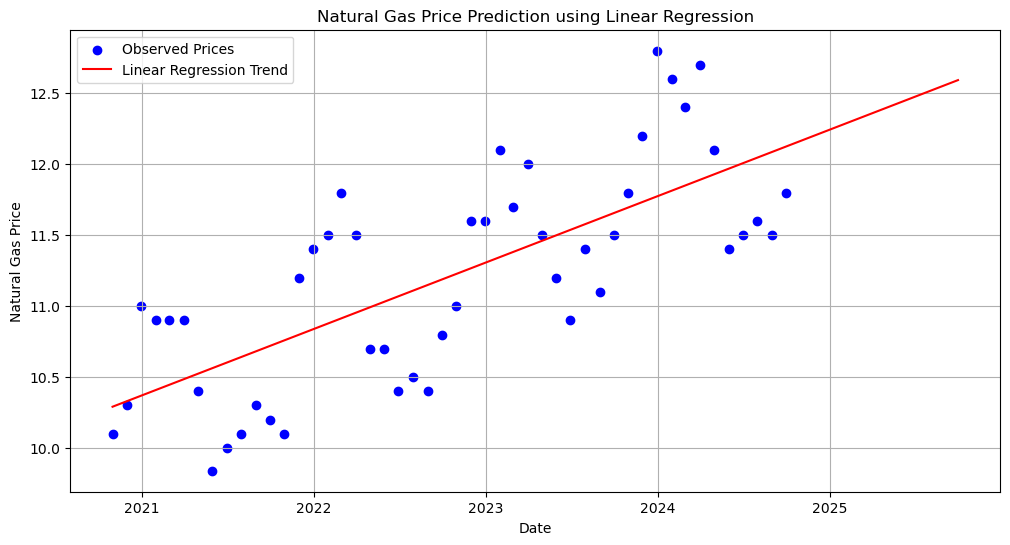

In [85]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Dates'], df['Prices'], color='blue', label='Observed Prices')
plt.plot(full_df['Dates'], model.predict(full_df[['Timestamp']]), linestyle='-', color='red', label='Linear Regression Trend')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Natural Gas Price Prediction using Linear Regression')
plt.legend()
plt.grid()
plt.show()

# Function to Estimate Price

In [87]:
# Function to estimate price for any given date
def estimate_price(date_str):
    date = pd.to_datetime(date_str)
    timestamp = datetime.toordinal(date)
    return model.predict(np.array([[timestamp]]))[0]

# Function to price the storage contract

In [89]:
def price_storage_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_storage, storage_cost, injection_cost, withdrawal_cost, transport_cost):
    total_value = 0
    total_costs = 0
    stored_volume = 0
    
    for inject_date in injection_dates:
        inject_price = estimate_price(inject_date)
        inject_volume = min(injection_rate, max_storage - stored_volume)
        stored_volume += inject_volume
        total_costs += inject_volume * inject_price + injection_cost + transport_cost
    
    for withdraw_date in withdrawal_dates:
        withdraw_price = estimate_price(withdraw_date)
        withdraw_volume = min(withdrawal_rate, stored_volume)
        stored_volume -= withdraw_volume
        total_value += withdraw_volume * withdraw_price
        total_costs += withdrawal_cost + transport_cost
    
    # Deduct storage costs
    total_costs += storage_cost * len(pd.date_range(injection_dates[0], withdrawal_dates[-1], freq='M'))
    
    return total_value - total_costs

In [95]:
# Example usage
injection_dates = ['2024-06-01']
withdrawal_dates = ['2024-12-01']
injection_rate = 500000  # in MMBtu
withdrawal_rate = 500000  # in MMBtu
max_storage = 1000000  # in MMBtu
storage_cost = 100000  # Monthly storage fee
injection_cost = 10000  # Cost per injection
withdrawal_cost = 10000  # Cost per withdrawal
transport_cost = 50000  # Cost per transport

In [97]:
contract_value = price_storage_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_storage, storage_cost, injection_cost, withdrawal_cost, transport_cost)
print(f"Contract Value: ${contract_value:,.2f}")

Contract Value: $-602,662.82


C:\Users\tinot\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tinot\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
